In [163]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import numpy as np

In [320]:
with pm.Model() as model:
    MAS_p = pm.Beta("MAS_p", mu=0.85, sigma=0.1)
    MAS_y = pm.Binomial("MAS_y", n=941, p=MAS_p, observed=[507])

    DISC_p_1 = pm.Beta("DISC_p_1", mu=0.99, sigma=0.05)
    DISC_p_2 = pm.Beta("DISC_p_2", mu=0.99, sigma=0.05)
    DISC_p_3 = pm.Beta("DISC_p_3", mu=0.99, sigma=0.05)
    DISC_y_1 = pm.Binomial("DISC_y_1", n=62, p=DISC_p_1, observed=[60])
    DISC_y_2 = pm.Binomial("DISC_y_2", n=161, p=DISC_p_2, observed=[138])
    DISC_y_3 = pm.Binomial("DISC_y_3", n=110, p=DISC_p_3, observed=[97])

    # Probability of passing all three DISCS, assuming independence
    DISC_p = pm.Deterministic("DISC_p", DISC_p_1 * DISC_p_2 * DISC_p_3)
    # Value of raise (considered as a perpetuity) and bonus
    DISC_EV = pm.Deterministic("DISC_EV", DISC_p * (30000 + 1500))
    MAS_EV = pm.Deterministic("MAS_EV", MAS_p * (50000 + 2500))
    MAS_diff_DISC_EV = pm.Deterministic("MAS_diff_DISC_EV", MAS_EV - DISC_EV)

In [321]:
with model:
    idata = pm.sample_prior_predictive(2500)

prior = az.extract(idata, "prior")

Sampling: [DISC_p_1, DISC_p_2, DISC_p_3, DISC_y_1, DISC_y_2, DISC_y_3, MAS_p, MAS_y]


(array([  2.,   2.,   3.,   3.,   2.,   7.,   7.,  13.,  21.,  21.,  26.,
         49.,  60.,  67., 102., 111., 151., 161., 214., 240., 268., 285.,
        309., 250., 126.]),
 array([0.37216771, 0.3972511 , 0.42233449, 0.44741788, 0.47250127,
        0.49758465, 0.52266804, 0.54775143, 0.57283482, 0.59791821,
        0.6230016 , 0.64808499, 0.67316838, 0.69825176, 0.72333515,
        0.74841854, 0.77350193, 0.79858532, 0.82366871, 0.8487521 ,
        0.87383549, 0.89891887, 0.92400226, 0.94908565, 0.97416904,
        0.99925243]),
 <BarContainer object of 25 artists>)

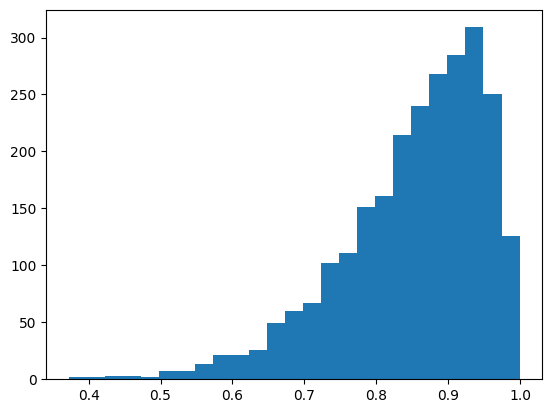

In [322]:
plt.hist(prior["MAS_p"], bins=25)

In [323]:
np.sum(prior["MAS_p"] >= 0.70).item() / len(prior["MAS_p"])

0.9112

(array([1.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 6.000e+00,
        3.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 6.000e+00, 7.000e+00,
        1.000e+00, 2.000e+00, 6.000e+00, 9.000e+00, 1.100e+01, 1.600e+01,
        2.500e+01, 3.300e+01, 4.100e+01, 4.100e+01, 7.500e+01, 1.160e+02,
        2.091e+03]),
 array([0.16736311, 0.20066858, 0.23397406, 0.26727954, 0.30058501,
        0.33389049, 0.36719596, 0.40050144, 0.43380691, 0.46711239,
        0.50041786, 0.53372334, 0.56702882, 0.60033429, 0.63363977,
        0.66694524, 0.70025072, 0.73355619, 0.76686167, 0.80016715,
        0.83347262, 0.8667781 , 0.90008357, 0.93338905, 0.96669452,
        1.        ]),
 <BarContainer object of 25 artists>)

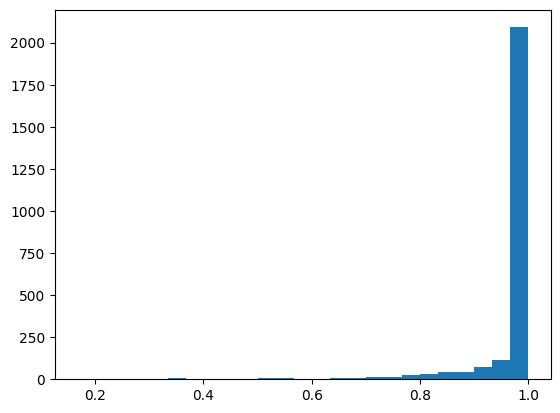

In [324]:
plt.hist(prior["DISC_p"], bins=25)

In [325]:
np.sum(prior["DISC_p"] >= 0.90).item() / len(prior["DISC_p"])

0.9128

In [326]:
with model:
    idata = pm.sample(2500)

posterior = az.extract(idata)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [MAS_p, DISC_p_1, DISC_p_2, DISC_p_3]


Sampling 4 chains for 1_000 tune and 2_500 draw iterations (4_000 + 10_000 draws total) took 2 seconds.


(array([   5.,    8.,   29.,   38.,   86.,  170.,  271.,  445.,  614.,
         786.,  990., 1163., 1211., 1099.,  909.,  786.,  564.,  337.,
         231.,  134.,   75.,   22.,   20.,    5.,    2.]),
 array([0.48450844, 0.48923206, 0.49395568, 0.49867931, 0.50340293,
        0.50812655, 0.51285017, 0.5175738 , 0.52229742, 0.52702104,
        0.53174466, 0.53646828, 0.54119191, 0.54591553, 0.55063915,
        0.55536277, 0.56008639, 0.56481002, 0.56953364, 0.57425726,
        0.57898088, 0.5837045 , 0.58842813, 0.59315175, 0.59787537,
        0.60259899]),
 <BarContainer object of 25 artists>)

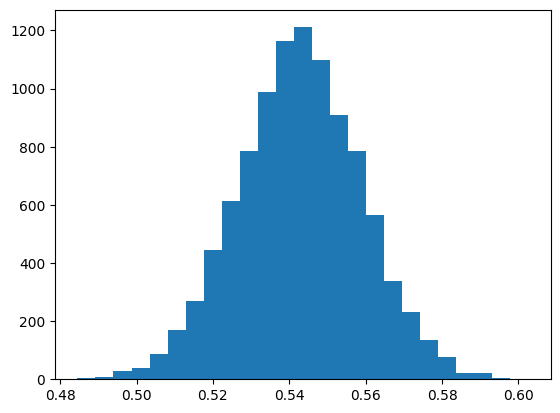

In [327]:
plt.hist(posterior["MAS_p"], bins=25)

(array([   5.,    7.,   12.,   25.,   36.,   66.,  163.,  230.,  369.,
         572.,  757.,  885., 1042., 1146., 1189., 1041.,  867.,  665.,
         432.,  261.,  146.,   43.,   31.,    7.,    3.]),
 array([0.58473356, 0.59592747, 0.60712137, 0.61831528, 0.62950918,
        0.64070309, 0.65189699, 0.66309089, 0.6742848 , 0.6854787 ,
        0.69667261, 0.70786651, 0.71906042, 0.73025432, 0.74144822,
        0.75264213, 0.76383603, 0.77502994, 0.78622384, 0.79741775,
        0.80861165, 0.81980555, 0.83099946, 0.84219336, 0.85338727,
        0.86458117]),
 <BarContainer object of 25 artists>)

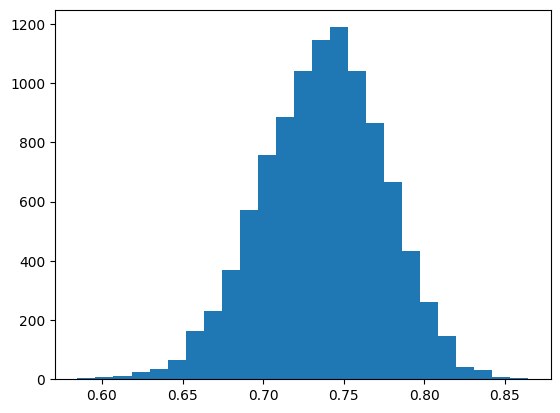

In [328]:
plt.hist(posterior["DISC_p"], bins=25)

In [329]:
np.mean(posterior["MAS_diff_DISC_EV"]).item()

5280.552495828085

(array([   2.,    0.,    8.,   35.,   51.,  140.,  233.,  417.,  635.,
         871., 1040., 1161., 1153., 1063.,  941.,  806.,  580.,  348.,
         247.,  132.,   62.,   34.,   25.,   12.,    4.]),
 array([ -219.27524182,   222.85549505,   664.98623192,  1107.11696879,
         1549.24770566,  1991.37844253,  2433.5091794 ,  2875.63991627,
         3317.77065314,  3759.90139001,  4202.03212688,  4644.16286375,
         5086.29360062,  5528.42433749,  5970.55507436,  6412.68581123,
         6854.8165481 ,  7296.94728497,  7739.07802184,  8181.20875871,
         8623.33949558,  9065.47023245,  9507.60096932,  9949.73170619,
        10391.86244306, 10833.99317993]),
 <BarContainer object of 25 artists>)

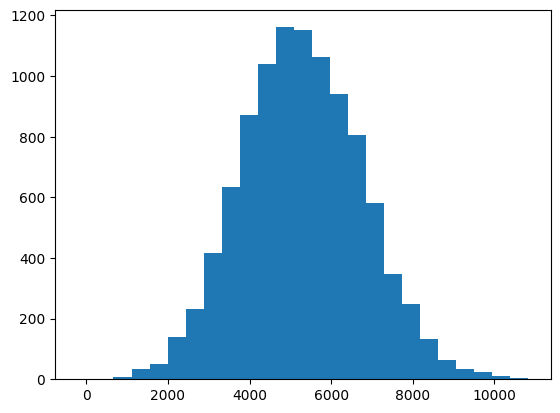

In [330]:
plt.hist(posterior["MAS_diff_DISC_EV"], bins=25)

In [331]:
np.sum(posterior["MAS_diff_DISC_EV"] > 0).item() / len(posterior["MAS_diff_DISC_EV"])

0.9999